In [1]:
%%bash
git branch -v 

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.
* emulate_z 4a58f0c [ahead 1] Problem with SB seems resolved. Still a problem with EC.
  master    2f632ff Figured out the source of that dumb averaging thing.


In [2]:
from pearce.emulator import OriginalRecipe, ExtraCrispy, SpicyBuffalo
from pearce.emulator import parameter, DEFAULT_PARAMS as PARAMS

In [3]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from itertools import cycle
colors = cycle(sns.color_palette())

In [4]:
training_dir = '/u/ki/swmclau2/des/PearceLHC_wp_z/'
fiducial_params = {'logM0': 12.20, 'logM1': 13.7, 'alpha': 1.02,
                      'logMmin': 12.1, 'f_c': 0.19, 'sigma_logM': 0.46}
rbins = np.array([  0.06309573,   0.12437607,   0.24517359,   0.34422476, 0.48329302, 0.67854546,\
           0.9526807 , 1.33756775,1.8779508 ,   2.6366509 ,   3.70186906,   5.19743987, 7.29722764, \
           10.24533859,  14.38449888,  20.1958975 , 28.35512583,  39.81071706] )
rpoints = (rbins[1:]+rbins[:-1])/2

In [5]:
y_param = 'z'
emulation_point = [('f_c', 0.233), ('logM0', 12.0), ('sigma_logM', 0.533), 
                   ('alpha', 1.083),('logM1', 13.5), ('logMmin', 12.233), ('z', 0.0)]
em_params = dict(emulation_point)
try:
    del em_params[y_param]
except KeyError:
    pass

In [6]:
or_params = PARAMS[:]
or_params.append(parameter('z', 0.0, 0.5))
or_params.append(parameter('r', 0, 1)) #95% sure bounds aren't used for r

In [7]:
y_param_idx = -1
for idx, p in enumerate(or_params):
    if p.name==y_param:
        y_param_idx = idx
        break
        
y_vals = np.linspace(or_params[y_param_idx].low, or_params[y_param_idx].high, 4)
em_params[y_param] = y_vals

In [8]:
print em_params[y_param]

[ 0.          0.16666667  0.33333333  0.5       ]


In [9]:
print em_params

{'logMmin': 12.233, 'f_c': 0.233, 'logM0': 12.0, 'sigma_logM': 0.533, 'logM1': 13.5, 'alpha': 1.083, 'z': array([ 0.        ,  0.16666667,  0.33333333,  0.5       ])}


In [10]:
emu1 = OriginalRecipe(training_dir,params=or_params)

0.519756838906
0.0


In [11]:
rpoints = np.logspace(np.log10(rbins[1]), np.log10(rbins[-2]), 10)

In [12]:
log_xi_pred= emu1.emulate_wrt_r(em_params, rpoints)
#log_xi_cov = np.zeros((log_xi_pred.shape[0], log_xi_pred.shape[0]))
#log_xi_err = np.sqrt(np.diag(log_xi_cov))
#log_xi_pred = log_xi_pred.reshape((-1, len(rpoints)))
#log_xi_err = log_xi_err.reshape((-1, len(rpoints)))
log_xi_err = np.zeros_like(log_xi_pred)

Mu r (1, 4, 10)


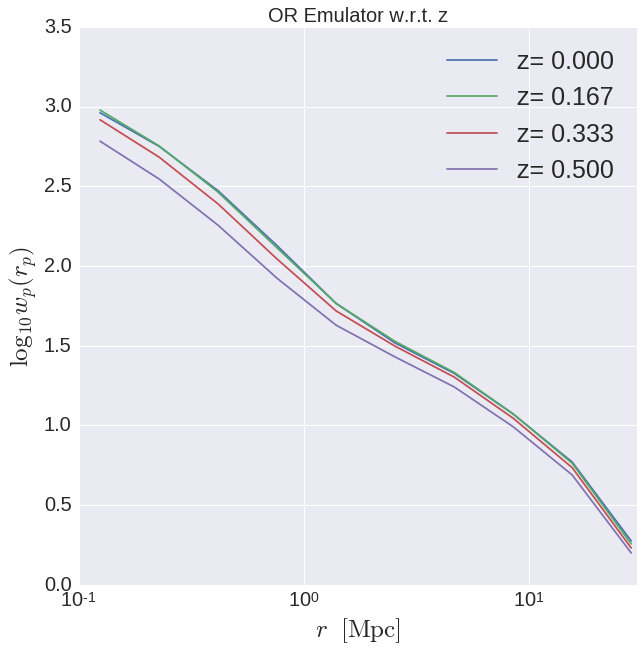

In [13]:
fig = plt.figure(figsize = (10, 10))
for label, lxp, lxe,c in zip(y_vals, log_xi_pred, log_xi_err ,colors):

    plt.plot(rpoints, lxp,label = 'z= %.3f'%label, color = c )

    plt.fill_between(rpoints,lxp+lxe,
                     lxp-lxe, color = c, alpha = 0.3)

plt.xlim(xmin = 0.1, xmax = 30)    
plt.ylim(ymin = 0, ymax = 3.5)
plt.title("OR Emulator w.r.t. %s"%y_param, fontsize =20)
#plt.loglog()
plt.xscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
plt.ylabel(r'$\log_{10}{w_p(r_p) }$', fontsize=25)
plt.legend(loc='best', fontsize=25)

In [14]:
em_params

{'alpha': 1.083,
 'f_c': 0.233,
 'logM0': 12.0,
 'logM1': 13.5,
 'logMmin': 12.233,
 'sigma_logM': 0.533,
 'z': array([ 0.        ,  0.16666667,  0.33333333,  0.5       ])}

In [15]:
x = np.array([[[range(10)], [range(10,21)], [range(20, 31)], [range(30,41)]],
             [[range(5,11)], [range(15,26)], [range(25, 36)], [range(35,46)]]])
print x
print x.shape
print x[:, 0]

[[[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]
  [[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
  [[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]]
  [[30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]]]

 [[[5, 6, 7, 8, 9, 10]]
  [[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]]
  [[25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]]
  [[35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]]]]
(2, 4, 1)
[[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]
 [[5, 6, 7, 8, 9, 10]]]


In [16]:
x[:, range(x.shape[0]), :] = x[:, range(x.shape[0]-1, -1, -1), :]
print x
print x[:, 0]

[[[[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
  [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]
  [[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]]
  [[30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]]]

 [[[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]]
  [[5, 6, 7, 8, 9, 10]]
  [[25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]]
  [[35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]]]]
[[[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
 [[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]]]


In [17]:
emu2 = ExtraCrispy(training_dir)#no r in params

0.519756838906
0.0


In [18]:
emu1.x[:34, -2:]

array([[ 0.51975684, -1.02809405],
       [ 0.51975684, -0.73335719],
       [ 0.51975684, -0.53062108],
       [ 0.51975684, -0.38325266],
       [ 0.51975684, -0.23588424],
       [ 0.51975684, -0.08851582],
       [ 0.51975684,  0.0588526 ],
       [ 0.51975684,  0.20622102],
       [ 0.51975684,  0.35358945],
       [ 0.51975684,  0.50095787],
       [ 0.51975684,  0.64832629],
       [ 0.51975684,  0.79569471],
       [ 0.51975684,  0.94306313],
       [ 0.51975684,  1.09043155],
       [ 0.51975684,  1.23779997],
       [ 0.51975684,  1.38516839],
       [ 0.51975684,  1.53253681],
       [ 0.51975684, -1.02809405],
       [ 0.51975684, -0.73335719],
       [ 0.51975684, -0.53062108],
       [ 0.51975684, -0.38325266],
       [ 0.51975684, -0.23588424],
       [ 0.51975684, -0.08851582],
       [ 0.51975684,  0.0588526 ],
       [ 0.51975684,  0.20622102],
       [ 0.51975684,  0.35358945],
       [ 0.51975684,  0.50095787],
       [ 0.51975684,  0.64832629],
       [ 0.51975684,

In [19]:
print emu2.redshift_bin_centers
print emu2.y[0, :, 0]
print emu2.y[0, 0, :]

[ 0.51975684  0.        ]
[ 2.25438399  2.21553692]
[ 2.25438399  2.03226291  1.8922488   1.78277548  1.67021052  1.55481677
  1.44490938  1.34279166  1.25301519  1.15260852  1.04608568  0.92320073
  0.77949112  0.62903593  0.43718708  0.18645943 -0.14618836]


In [20]:
log_xi_pred = emu2.emulate_wrt_r(em_params,rpoints)
#log_xi_cov = np.zeros((log_xi_pred.shape[0], log_xi_pred.shape[0]))
#log_xi_err = np.sqrt(np.diag(log_xi_cov))
#print log_xi_pred
#log_xi_pred = log_xi_pred.reshape((-1, len(rpoints)))
#log_xi_err = log_xi_err.reshape((-1, len(rpoints)))
log_xi_err = np.zeros(log_xi_pred.shape)

y (500, 2, 17)
[ 2.25438399  2.21553692]
[ 2.90930944  2.9302013 ]
AM (1, 2, 17)
[ 2.77933317  2.9715692 ]
Mu (34,)
All mu (1, 2, 17)
[ 2.77933317  2.9715692 ]
[ 2.77933317  2.45867876  2.27676726  2.16028616  1.96330523  1.78555736
  1.64966139  1.5104584   1.43247532  1.31171924  1.21616994  1.08422899
  0.9326025   0.80849427  0.60462996  0.34595395 -0.00802691]
z [ 0.51975684  0.        ]
r [  0.0937359    0.18477483   0.29469917   0.41375889   0.58091924
   0.81561308   1.14512422   1.60775928   2.25730085   3.16925998
   4.44965447   6.24733375   8.77128311  12.31491873  17.29019819
  24.27551166  34.08292144]
im (4, 10)
z [ 0.          0.16666667  0.33333333  0.5       ]
r [  0.12437607   0.2273658    0.41563627   0.7598043    1.388961
   2.53909153   4.64158879   8.48506098  15.51112413  28.35512583]
mu (1, 4, 10)
[ 2.88838713  2.81881171  2.7492363   2.67966088]
[ 2.88838713  2.661804    2.36982391  2.04263442  1.71480695  1.47809085
  1.28284267  1.03548428  0.73619448  0.243

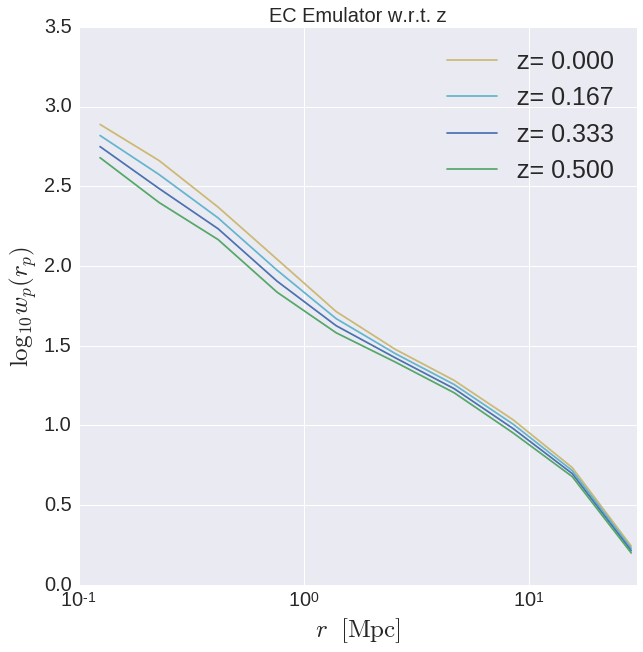

In [21]:
fig = plt.figure(figsize = (10, 10))
for label, lxp, lxe,c in zip(y_vals, log_xi_pred, log_xi_err ,colors):

    #plt.plot(rpoints, lxp,label = 'z= %.3f'%label, color = c )
    plt.plot(rpoints, lxp,label = 'z= %.3f'%label, color = c )

    plt.fill_between(rpoints,lxp+lxe,
                     lxp-lxe, color = c, alpha = 0.3)

plt.xlim(xmin = 0.1, xmax = 30)    
plt.ylim(ymin = 0, ymax = 3.5)
plt.title("EC Emulator w.r.t. %s"%y_param, fontsize =20)
#plt.loglog()
plt.xscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
plt.ylabel(r'$\log_{10}{w_p(r_p) }$', fontsize=25)
plt.legend(loc='best', fontsize=25)

In [22]:
or_params = PARAMS[:]
or_params.append(parameter('z', 0.0, 0.5))
#or_params.append(parameter('r', 0, 1)) #95% sure bounds aren't used for r
emu3 = SpicyBuffalo(training_dir, em_param = 'z', params = or_params)#no r in params

0.519756838906
0.0


In [23]:
print len(emu3.emulators)
print emu3.em_bin_centers

17
[  0.0937359    0.18477483   0.29469917   0.41375889   0.58091924
   0.81561308   1.14512422   1.60775928   2.25730085   3.16925998
   4.44965447   6.24733375   8.77128311  12.31491873  17.29019819
  24.27551166  34.08292144]


In [24]:
print em_params['z']

[ 0.          0.16666667  0.33333333  0.5       ]


In [25]:
log_xi_pred = emu3.emulate_wrt_r(em_params,rpoints)
#log_xi_cov = np.zeros((log_xi_pred.shape[0], log_xi_pred.shape[0]))
#log_xi_err = np.sqrt(np.diag(log_xi_cov))
#print log_xi_pred
#log_xi_pred = log_xi_pred.reshape((-1, len(rpoints)))
#log_xi_err = log_xi_err.reshape((-1, len(rpoints)))
log_xi_err = np.zeros(log_xi_pred.shape)

mu (68,)
All mu (1, 4, 17)
[[  3.04722959e+00   2.82708528e+00   2.63928192e+00   2.47560611e+00
    2.28808200e+00   2.08028976e+00   1.86669110e+00   1.69089914e+00
    1.55684272e+00   1.44731668e+00   1.34868938e+00   1.20305656e+00
    1.05427096e+00   9.04343238e-01   6.92805632e-01   4.32506089e-01
    7.11081275e-02]
 [  3.06929207e+00   2.83516235e+00   2.63779180e+00   2.46649643e+00
    2.27451779e+00   2.06735699e+00   1.86164603e+00   1.69454096e+00
    1.56823026e+00   1.45644937e+00   1.35220208e+00   1.20883470e+00
    1.05542144e+00   8.99415351e-01   6.85271455e-01   4.16003381e-01
    4.97247172e-02]
 [  3.01107249e+00   2.76869314e+00   2.56666078e+00   2.39202474e+00
    2.20051603e+00   1.99947220e+00   1.80732522e+00   1.65358997e+00
    1.53860194e+00   1.42744419e+00   1.32014995e+00   1.18290204e+00
    1.02876262e+00   8.70602325e-01   6.59419730e-01   3.88004297e-01
    2.63545760e-02]
 [  2.87726725e+00   2.63303550e+00   2.43162010e+00   2.25818969e+00
   

In [26]:
print log_xi_pred.shape

(4, 10)


In [27]:
print log_xi_pred[0, :]

[ 2.97313756  2.75431953  2.47350002  2.1297015   1.77403806  1.52299974
  1.33314048  1.07114362  0.76844783  0.28217442]


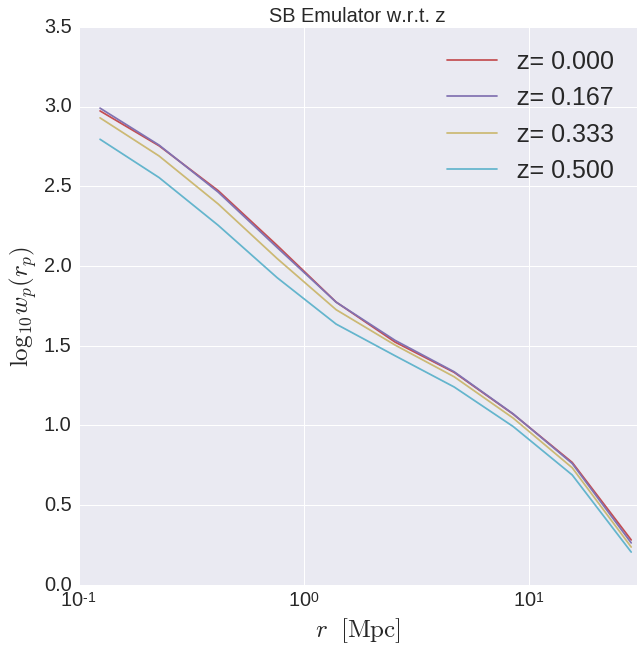

In [28]:
fig = plt.figure(figsize = (10, 10))
for label, lxp, lxe,c in zip(y_vals, log_xi_pred, log_xi_err ,colors):

    #plt.plot(rpoints, lxp,label = 'z= %.3f'%label, color = c )
    plt.plot(rpoints, lxp,label = 'z= %.3f'%label, color = c )

    plt.fill_between(rpoints,lxp+lxe,
                     lxp-lxe, color = c, alpha = 0.3)

plt.xlim(xmin = 0.1, xmax = 30)    
plt.ylim(ymin = 0, ymax = 3.5)
plt.title("SB Emulator w.r.t. %s"%y_param, fontsize =20)
#plt.loglog()
plt.xscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
plt.ylabel(r'$\log_{10}{w_p(r_p) }$', fontsize=25)
plt.legend(loc='best', fontsize=25)